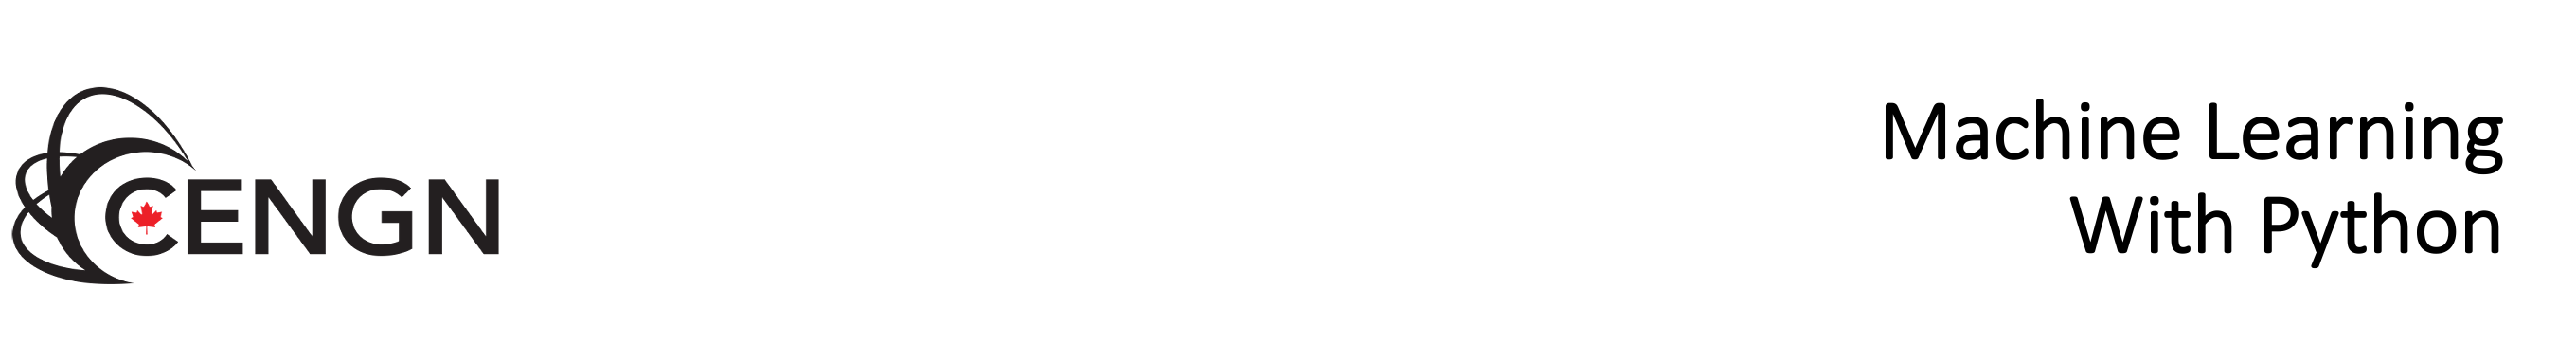

# **Section 4.3. Hands-On Clustering**

In this section, we will learn to implement mixture models using the popular scikit-learn library. 

## **Lab 4 - Mixture Models**

### **Lab 4 - Part A**

**Step 1: Importing Libraries**

In [1]:
# Import libraries  

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Step 2: Importing the Dataset**

In [2]:
# Read in the clustering_gmm.csv dataset using pandas 

data = pd.read_csv('clustering_gmm.csv')

**Step 3: Inspecting the Data**

In [3]:
# Inspect the head of the data to confirm data has been imported correctly

data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [4]:
data.shape

(500, 2)

In [5]:
# Describe the data and obtain data summary

data.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


The `describe()` output above shows no outliers in the data; minimum and maximum values of height (in cm) and weight (in kg) are reasonable, and there are no negative numbers.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


The above output reveals that the dataset is composed of 500 rows and it is clean; has no NaN values.

**Step 4: Visualizing the Data**

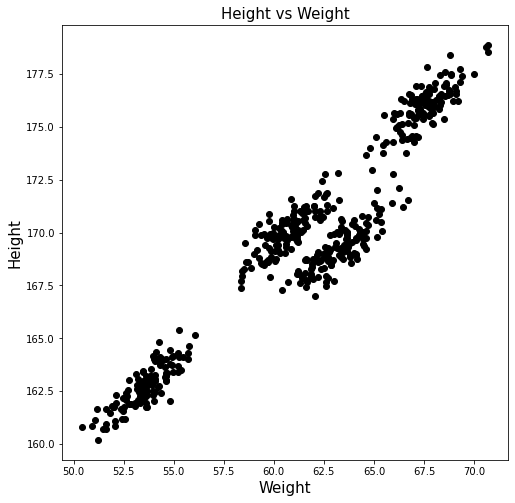

In [7]:
# Generate a scatter plot of the data

plt.figure(figsize=(8,8))   # figure size
plt.scatter(data["Weight"],data["Height"], c = 'black')

plt.xlabel('Weight', fontsize = 15)
plt.ylabel('Height', fontsize = 15)

plt.title('Height vs Weight', fontsize = 15)
plt.show()

The plot reveals a strong correlation between height and weight in our dataset, as we would expect. There appear to be four distinct clusters.

We will run the data against the K-Means model and see if it will recover these four clusters.

**Step 5: Running the Data Against K-Means Model**

In [8]:
# Import KMeans algorithm and train it on the data for K = 4

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# Store the predictions from K-means

pred = kmeans.predict(data)
print("Predictions:\n",pred)


data['Cluster'] = pred   # Add a new column having the predictions to the dataset 

Predictions:
 [2 2 3 3 2 3 1 3 1 0 1 2 1 0 3 3 2 3 0 3 3 2 1 0 3 0 2 1 0 1 1 1 2 1 1 2 0
 1 0 2 0 1 3 2 1 2 1 3 2 2 0 0 1 1 3 1 1 0 0 2 2 0 2 2 2 1 3 2 3 1 0 3 0 2
 0 2 1 1 3 3 0 3 0 1 3 1 0 0 2 0 0 0 2 0 3 3 2 2 2 3 0 0 2 0 3 3 3 2 3 0 0
 1 0 0 2 0 2 3 1 2 1 0 2 2 0 2 2 2 2 0 3 0 1 0 0 0 3 2 3 1 2 2 2 2 1 0 1 3
 1 0 0 2 3 3 3 1 1 2 3 3 2 3 2 2 1 1 2 3 0 1 2 0 2 1 1 0 1 0 0 0 2 2 1 3 3
 0 1 2 1 0 2 1 0 1 1 0 3 1 3 0 0 3 3 1 3 1 1 3 1 1 3 2 2 2 3 2 1 0 0 0 1 2
 1 0 1 2 0 3 0 3 1 1 3 1 3 1 3 1 0 2 2 1 3 2 0 0 3 2 3 1 3 1 2 0 3 0 0 1 0
 1 3 3 2 0 2 2 3 3 0 2 3 0 2 3 2 0 1 1 3 2 2 3 2 1 2 3 1 2 3 3 3 2 0 0 2 0
 0 0 3 2 2 0 1 0 2 2 1 0 0 3 0 1 2 1 0 1 0 3 1 3 3 3 1 1 0 2 3 1 0 2 3 3 2
 2 1 2 1 3 3 1 0 2 2 1 2 3 2 2 2 2 3 2 3 2 3 3 0 2 3 0 0 3 3 2 2 1 1 2 3 0
 3 3 3 0 3 3 3 0 0 3 0 0 3 0 0 1 3 1 1 0 0 0 0 2 0 2 3 2 0 3 2 3 2 3 3 1 0
 3 0 1 1 2 0 1 3 2 0 1 1 3 2 3 2 1 2 1 2 0 3 2 0 2 3 1 1 1 2 0 3 3 1 2 2 3
 3 1 3 3 0 2 1 2 0 3 1 1 0 1 3 0 1 1 1 1 1 3 0 2 1 2 3 2 1 0 3 0 1 0 3 0 3
 1 1 0 1 1 

The above output, shows the model predictions classified into four clusters.

Let us view `frame` to confirm the cluster assignments have been assigned to each observation. 

In [9]:
# Inspect cluster assignments using sample() functions

data.sample(n=8)

,Weight,Height,Cluster
72,51.798233,161.477797,0
203,63.677142,169.405844,1
493,61.848894,168.260194,3
110,53.998487,163.000888,0
284,67.500671,176.277487,2
75,68.742797,176.761389,2
336,64.105048,169.636201,1
443,60.079871,168.646482,3


**Step 6: Visualizing the Results**

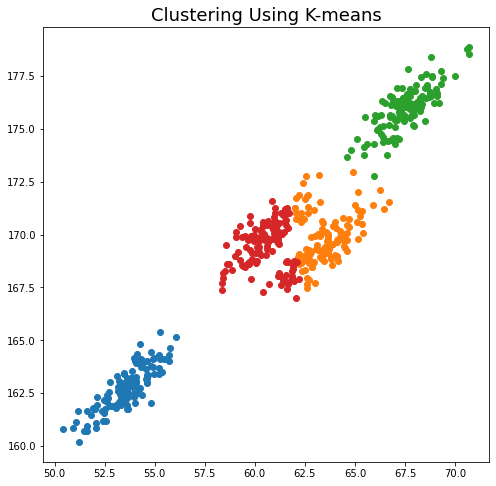

In [10]:
# Plot results

plt.figure(figsize=(8,8))     # Set the size of the figure

for k in range(0,4):
    data_cluster = data[data["Cluster"]==k]  # data[true]; Select the observaions that belong to cluster 'k'
    plt.scatter(data_cluster["Weight"],data_cluster["Height"],cmap = 'viridis')   # Scatter plot per cluster 
                                                                  # cmap assigns different colors to each cluster
    
plt.title('Clustering Using K-means', fontsize = 18)             # Set the title of the plot
plt.show()

Note that `frame["cluster"]==2`  returns `True` if an observation belongs to cluster 2 (K=2)
and `frame[frame["cluster"]==2]` will return a dataset having those observations, that is, observations in cluster 2.

As seen above, the K-Means algorithm fails to correctly identify the four clusters. As noted above, this failure of K-Means stems from the fact that it is a distance-based clustering algorithm. 

Mixture models offer a **distributed based-clustering** approach. Next, we will study the implementation of a Gaussian mixture model and see whether it performs better than K-Means at identifying the clusters in the data.

## **Lab 4 - Part B**

**Step 1: Importing Libraries**

In [11]:
# Import libraries  

import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

**Step 2: Importing the Dataset**

In [12]:
# Read in the data

data = pd.read_csv('clustering_gmm.csv')
data.sample(n=3)

,Weight,Height
33,63.881092,170.417157
449,67.509746,176.170991
294,67.959563,175.126844


 Here, we do not need to inspect the data again, as it is the same dataset that we used in Part A.

**Step 3: Running the Machine Learning Model**

Let us now use the `GaussianMixture()` function from Sklearn and train it on our current dataset to obtain cluster assignments. 

In [13]:
# Train the GaussianMixture on the data

from sklearn.mixture import GaussianMixture
gm_model = GaussianMixture(n_components=4)
gm_model.fit(data)

# Store the predictions of the mixture model

predictions = gm_model.predict(data)

data['Cluster'] = predictions

Let us view few rows of `data` to confirm the cluster assignments have been assigned to each observation. 

In [14]:
# Display random 5 rows

data.sample(n=10)

,Weight,Height,Cluster
436,67.308444,175.667912,2
230,64.089041,169.722784,3
482,65.113663,170.597552,3
181,67.773328,176.911080,2
116,67.093274,175.401125,2
494,62.200362,167.889268,3
346,67.885676,175.756323,2
280,66.927679,174.544724,2
267,61.092919,169.957606,0
248,61.090496,170.457400,0


**Step 4: Visualizing the Results**

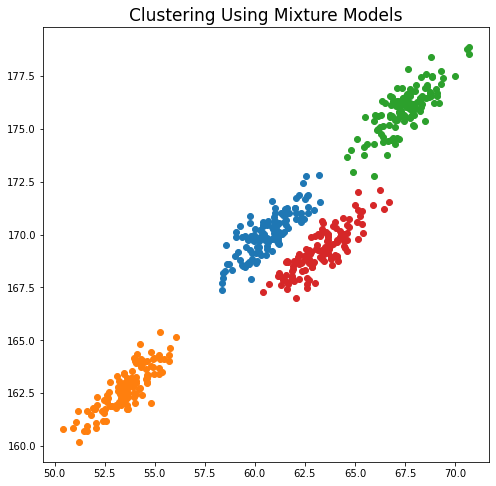

In [15]:
# Visualize the clusters

plt.figure(figsize=(8,8))
for k in range(0,4):
    data_cluster = data[data["Cluster"]==k]
    plt.scatter(data_cluster["Weight"],data_cluster["Height"],cmap = 'viridis')
    
plt.title('Clustering Using Mixture Models', fontsize = 17)
plt.show()

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to LMS to review the lab results, complete review questions, and then start with Section 4.4 (Association Learning).
